##PREDICTIVE ANALYSIS ON THE IMPACT OF ADVERTISING MEDIAS ON SALES 

In [295]:
#IMPORTING NECCESSARY PYTHON LIBRARIES FOR EDA

In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [297]:
#Read CSV file and Store in a variable called advert then print output

advert = pd.read_csv('Documents/advertising.csv')
advert

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [298]:
#Ascessing Data information

advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [299]:
# Displays a descriptive statistics of Dataset
advert.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [300]:
advert.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [301]:
#Removing an Unnamed column from data frame
advert = advert.drop(['Unnamed: 0'],axis = 1)
advert

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [302]:
# To show the numbers of rows and columns in the Dataset
advert.shape

(200, 4)

In [303]:
#checking for Null Values

advert.isna().sum()

#Dataset does not contain any null value

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

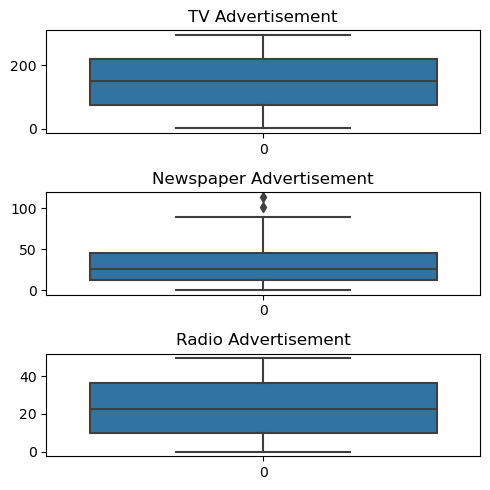

In [375]:
fig, axs = plt.subplots(3, figsize=(5, 5))

# TV Boxplot
sns.boxplot(advert['TV'], ax=axs[0])
axs[0].set_title('TV Advertisement')

# Newspaper Boxplot
sns.boxplot(advert['Newspaper'], ax=axs[1])
axs[1].set_title('Newspaper Advertisement')

# Radio Boxplot
sns.boxplot(advert['Radio'], ax=axs[2])
axs[2].set_title('Radio Advertisement')

plt.tight_layout()
plt.show()


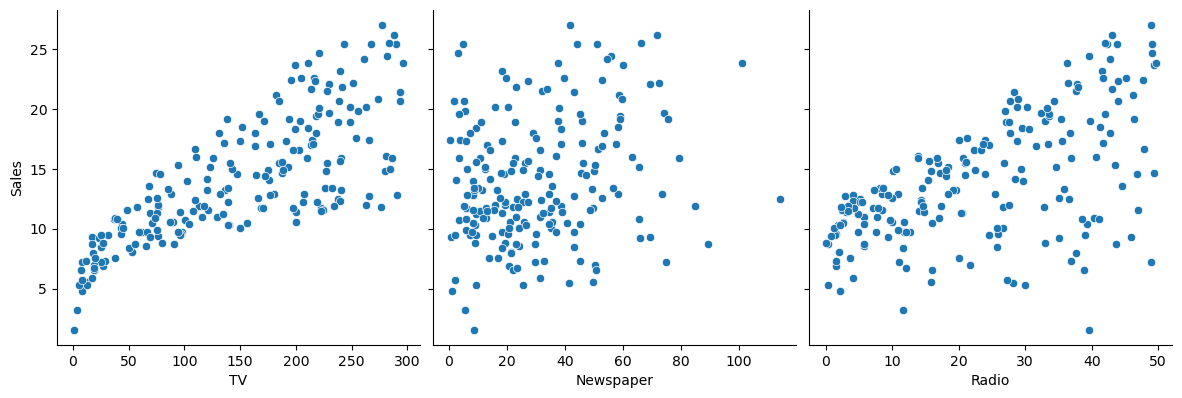

In [377]:
sns.pairplot(advert, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

In [380]:
advert.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [1]:
#TV is has a very strong correlation, therefore it best best platform to improve sales

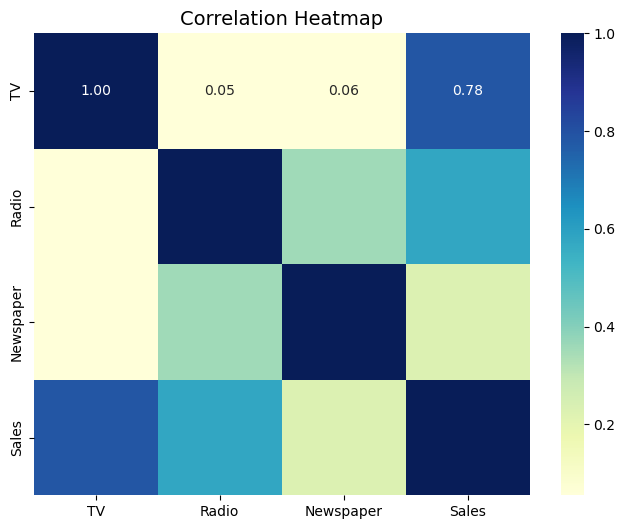

In [379]:
sns.heatmap(advert.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [2]:
#predicting sales based on platforms 

In [305]:
from sklearn.model_selection import train_test_split

In [306]:
X = advert.drop(['Sales','Newspaper','Radio'], axis = 1)
y = advert['Sales']
X

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [308]:
advert_trained = X_train.join(y_train)
advert_trained

,TV,Sales
79,116.0,11.0
197,177.0,12.8
38,43.1,10.1
24,62.3,9.7
122,224.0,11.6
...,...,...
106,25.0,7.2
14,204.1,19.0
92,217.7,19.4
179,165.6,12.6


In [309]:
X_test.join(y_test).shape

(40, 2)

In [310]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()




X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)


reg.fit(X_train_s,y_train)


LinearRegression()

In [311]:
reg.score(X_train_s, y_train)


0.5911667812043272

In [312]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_train,y_train)

0.5911667812043271

In [313]:

y_pred = reg.predict(X_test)
comparison_df = pd.DataFrame({ "Predicted Sales": y_pred[:16],"Actual Sales": y_test[:16].values})

# Display the DataFrame in a clean format
print(comparison_df.to_string(index=False))

 Predicted Sales  Actual Sales
       14.717944          16.9
       16.211548          22.4
       20.748197          21.4
        7.664036           7.3
       17.370139          24.7
       10.614021          12.6
       17.207285          22.3
        9.446125           8.4
       17.467851          11.5
       15.266995          14.9
        8.585325           9.5
        9.734609           8.7
       18.030861          11.9
        7.370899           5.3
       13.610536          10.3
       15.038999          11.7


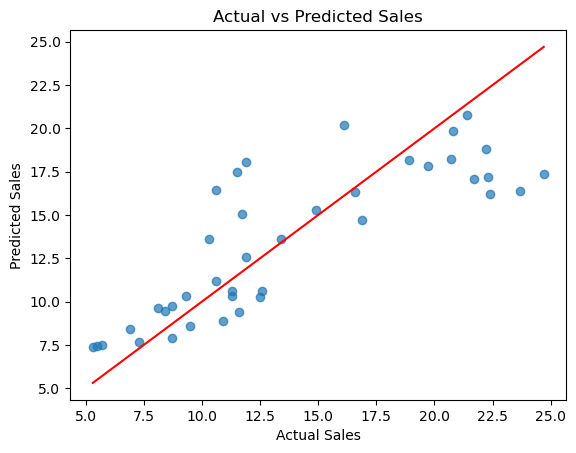

In [314]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


In [315]:
from sklearn.metrics import mean_squared_error
r_squared = reg.score(X_test,y_test)
rmse = mean_squared_error(y_test,y_pred, squared = False)
rmse
r_squared


0.6766954295627077

In [316]:
rmse

3.194472431998898

In [317]:
from sklearn.model_selection import cross_val_score,KFold
kf = KFold(n_splits = 6, shuffle = True, random_state = 42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X,y,cv = kf)
print(cv_results)

[0.65772346 0.573892   0.67795357 0.60047754 0.5114863  0.48037784]


In [318]:
print(np.mean(cv_results),np.std(cv_results))

0.5836517842445011 0.07145064177755119


In [319]:
print(np.quantile(cv_results,[0.025,0.975]))

[0.48426639 0.67542481]


In [341]:
X = advert.drop(['Sales','TV','Newspaper'], axis = 1)
y = advert['Sales']
X.head()


,Radio
0,37.8
1,39.3
2,45.9
3,41.3
4,10.8


In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [343]:
advert_trained = X_train.join(y_train)
advert_trained

,Radio,Sales
79,7.7,11.0
197,9.3,12.8
38,26.7,10.1
24,12.6,9.7
122,2.4,11.6
...,...,...
106,11.0,7.2
14,32.9,19.0
92,33.5,19.4
179,10.0,12.6


In [344]:
X_test.join(y_test).shape

(40, 2)

In [345]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train,y_train)

reg.score(X_train,y_train)

0.35090564286715287

In [350]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)

X_test_s = scaler.transform(X_test)


reg.fit(X_train_s,y_train)


LinearRegression()

In [351]:
reg.score(X_train_s, y_train)


0.35090564286715276

In [356]:
y_pred = reg.predict(X_test_s)
comparison_df = pd.DataFrame({ "Predicted Sales": y_pred[:16],"Actual Sales": y_test[:16].values})

# Display the DataFrame in a clean format
print(comparison_df.to_string(index=False))

 Predicted Sales  Actual Sales
       15.883322          16.9
       19.174272          22.4
       15.208779          21.4
       16.966678           7.3
       19.440001          24.7
       16.578305          12.6
       18.397526          22.3
       11.795185           8.4
       10.119049          11.5
       14.023220          14.9
       14.452474           9.5
       10.589185           8.7
       10.119049          11.9
       15.535830           5.3
        9.853320          10.3
       11.018439          11.7


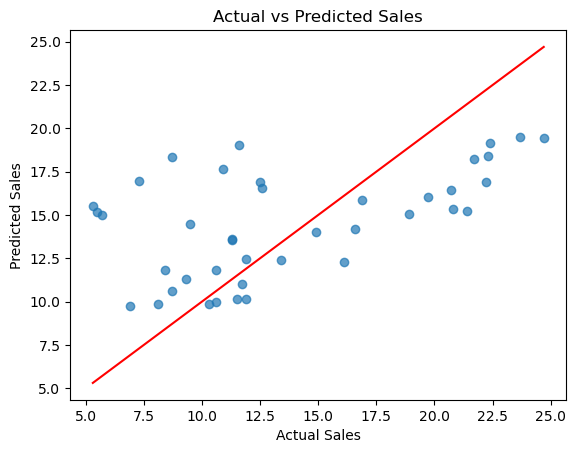

In [357]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show() 

In [359]:
from sklearn.metrics import mean_squared_error
r_squared = reg.score(X_test_s,y_test)
rmse = mean_squared_error(y_test,y_pred, squared = False)
rmse
r_squared

0.2634309396999791

In [360]:
rmse

4.8216974799471926

In [361]:
X = advert.drop(['Sales','TV','Radio'], axis = 1)
y = advert['Sales']


In [362]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [363]:
advert_trained = X_train.join(y_train)
advert_trained.head(7)

,Newspaper,Sales
79,23.1,11.0
197,6.4,12.8
38,35.1,10.1
24,18.3,9.7
122,15.6,11.6
195,13.8,7.6
29,40.8,10.5


In [364]:
X_test.join(y_test).head()

,Newspaper,Sales
95,52.9,16.9
15,52.9,22.4
30,43.2,21.4
158,45.2,7.3
128,3.2,24.7


In [365]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_train,y_train)

0.05658396829234358

In [366]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()




X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)


reg.fit(X_train_s,y_train)


LinearRegression()

In [367]:
reg.score(X_train_s, y_train)

0.05658396829234347

In [369]:
y_pred = reg.predict(X_test_s)
comparison_df = pd.DataFrame({ "Predicted Sales": y_pred[:16],"Actual Sales": y_test[:16].values})

# Display the DataFrame in a clean format
print(comparison_df.to_string(index=False))

 Predicted Sales  Actual Sales
       15.471678          16.9
       15.471678          22.4
       14.892038          21.4
       15.011551           7.3
       12.501770          24.7
       15.459726          12.6
       13.935931          22.3
       13.410072           8.4
       13.093361          11.5
       14.192884          14.9
       12.442013           9.5
       14.085322           8.7
       17.377916          11.9
       12.872261           5.3
       13.900076          10.3
       14.413984          11.7


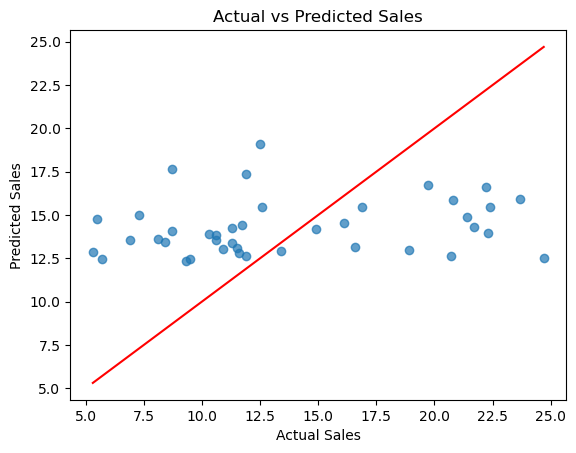

In [370]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show() 

In [371]:
from sklearn.metrics import mean_squared_error
r_squared = reg.score(X_test_s,y_test)
rmse = mean_squared_error(y_test,y_pred, squared = False)
rmse
r_squared

0.029871749149522397

In [372]:
rmse

5.533600454969853